# Nama: Nanda Harsana Octavya
# Nim: 09011381722142
# SK5 Unggulan

# Implementasi Logika Fuzzy Mamdani untuk Mendeteksi Kerentanan Daerah Banjir di Semarang Utara

Salah satu masalah lingkungan adalah banjir. Banjir menjadi bencana tahunan yang sampai sekarang masih menjadi tugas pemerintah Kota Semarang dalam penanggulanganya. Banyak faktor yang menjadi penyebab banjir baik alam maupun manusia. Banjir yang disebabkan alam seperti curah hujan, pengaruh fisiologi sungai, erosi dan sedimentasi, kapasitas sungai, kapasitas draenase, pengaruh air pasang. Sementara banjir disebabkan oleh faktor manusia antara lain perubahan kondisi das, wilayah kumuh, sampah, kerusakan bangunan pengendali banjir, dll. 


Kondisi topografi yang datar dan rendah di wilayah utara dan berupa pegunungan diwilayah selatan menjadi salah satu penyebab banjir di Semarang. Wilayah Semarang Utara merupakan daerah rawan terhadap banjir dan rob. Terletak di pantai Semarang secara langsung berbatasan dengan Laut Jawa. Rata-rata ketinggian air tanah tidak jauh dari permukaaan air laut membuat banjir sering terjadi di daerah ini. Selain saat musim hujan di Semarang Utara, saat musim kemarau juga terjadi banjir rob, hal itu disebabkan karena dimensi saluran yang tidak memadai untuk menampung debit air pasang yang masuk ke sungai menyebabkan air melimpah ke daratan.


perkiraan banjir biasanya menggunakan 2 parameter atau variabel, yaitu ketinggian wilayah dan curah hujan. Dari kedua variabel tersebut, akan dihasilkan sebuah output yaitu nilai kerentanan banjir. Pada sistem ini digunakan logika fuzzy, dengan metode mamdani untuk menentukan prediksi cuaca berdasarkan parameter yang ada.

### Mengimpor library untuk fuzzy

ada beberapa library yang digunakan yaitu **numpy** berguna untuk membaca nilai string/float pada angka atau bilangan input/output, 
**skfuzzy** berguna untuk pengoperasian aritmatika untuk mencari nilai tengah atau nilai terbaik dari suatu perhitungan dan 
**matplotlib.pyplot** berguna untuk menampilkan gambar atau grafik dari suatu coding/perhitungan dalam cell python 

In [3]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

adapun varibel input dan output akan dijabarkan dalam linguistik sebagai berikut: 

### INPUT

Ketinggian wilayah 

-rendah: 1-200 mdpl

-sedang: 175-400 mdpl

-tinggi: 300-450 mdpl


curah hujan

-rendah: 1-20 mm/hari

-sedang: 15-20 mm/hari

-tinggi: 40-100 mm/hari

-sangat tinggi:90 mm/hari


### OUTPUT

ketentanan banjir

-aman:123-248

-rawan:220-402

-banjir:374-420

In [4]:
ketinggianwilayah = ctrl.Antecedent(np.arange(1, 450, 1), 'Ketinggian Wilayah')
curahhujan = ctrl.Antecedent(np.arange(1, 120, 1), 'Curah Hujan')
kerentananbanjir = ctrl.Consequent(np.arange(123, 450, 1), 'Kerentanan Banjir')

#untuk plot terpisah
ketinggianwilayah1 = np.arange(1, 450, 1)
curahhujan1 = np.arange(1, 120, 1)
kerentananbanjir1 = np.arange(123, 450, 1)

Penggunaan Antecedent sebagai input atau permis yang dimana inputnya adalah nilai dari ketinggian wilayah dan curah hujan, sedangkan penggunaan Consequent sebagai output atau kesimpulan yang dimana outputnya adalah nilai dari kerentanan banjir. pada nilai ketinggian wilayah nilai awalnya 1 sedangakan nilai akhirnya 450 dan kelipatannya 1. pada nilai curah hujan nilai awalnya 1 sedangkan nilai akhirnya 120 dan kelipatannya 1. pada nilai kerentanan banjir nilai awalnya 123 sedangkan nilai akhirnya 420 dan kelipatannya 1

Fungsi Keanggotaan
Terdapat 3 fungsi keanggotaan dari setiap fuzzifikasi input ketinggian wilayah, yaitu
1. Ketinggian Wilayah **rendah** = 1-200 mdpl
2. Ketinggian Wilayah **sedang** = 175-400 mdpl
3. Ketinggian Wilayah **tinggi** = 300-450 mdpl

Dengan fungsi keanggotaan ketinggian wilayah

\begin{equation}
  ketinggian wilayah['rendah'] = \mu KetinggianWilayahRendah(x)=\begin{cases}
    1, & \text{$1\leq x\leq200$}.\\
    (1 - x)/(1 - 200) , & \text{$1 \leq x \leq 200$}.\\
    0, & \text{$x\geq 200$}.
  \end{cases}
  \\
  ketinggian wilayah['sedang'] = \mu KetinggianWilayahSedang(x)=\begin{cases}
    0, & \text{$x\leq 175$ atau $x\geq400$}.\\
    (x - 175)/(287 - 175) , & \text{$175 \leq x \leq 287$}.\\
    (400 - x)/(400 - 287) , & \text{$287 \leq x \leq 400$}.\\
  \end{cases}
  \\
    ketinggian wilayah['tinggi'] = \mu KetinggianWilayahTinggi(x)=\begin{cases}
    0, & \text{$x\leq 300$}.\\
    (x - 300)/(400 - 300) , & \text{$300 \leq x \leq 400$}.\\
    1, & \text{$x\geq 400$}.
  \end{cases}
\end{equation}

In [5]:
ketinggianwilayah['rendah']=fuzz.trapmf(ketinggianwilayah.universe, [1, 1, 175, 200])
ketinggianwilayah['sedang']=fuzz.trimf(ketinggianwilayah.universe, [175, 287, 400])
ketinggianwilayah['tinggi']=fuzz.trapmf(ketinggianwilayah.universe, [300, 400, 450, 450])

#untuk plot terpisah
ketinggianwilayah1_rendah = fuzz.trapmf(ketinggianwilayah1, [1, 1, 175, 200])
ketinggianwilayah1_sedang = fuzz.trimf(ketinggianwilayah1, [175, 287, 400])
ketinggianwilayah1_tinggi = fuzz.trapmf(ketinggianwilayah1, [300, 400, 450, 450])


Karena kita akan menggunakan kurva trapesium, maka fungsi yang akan digunakan adalah fuzz.trapmf lalu untuk mendefinisikan domainnya, digunakan variabel.universe. domain (batas-batas) pada kurva trapesium ini adalah [batas awal, titik puncak1, titik puncak2, batas akhir] dan kurva segitiga, maka fungsi yang akan digunakan adalah fuzz.trimf domainnya adalah [batas awal, titik puncak, batas akhir] .


Text(0.5,1,'ketinggian wilayah rendah')

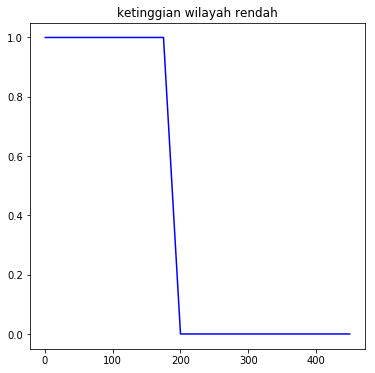

In [6]:
ketinggianwilayah_rendah = fuzz.trapmf(ketinggianwilayah1,[1, 1, 175, 200])
fig, (ax0) = plt.subplots(nrows=1,figsize=(6,6))
ax0.plot(ketinggianwilayah1, ketinggianwilayah1_rendah,'blue')
ax0.set_title('ketinggian wilayah rendah')

kurva diatas adalah kurva ketinggian wilayah rendah dengan titik awal (1), titik puncak 1(1), titik pucak2 (175), titik akhir (200)

Text(0.5,1,'ketinggian wilayah sedang')

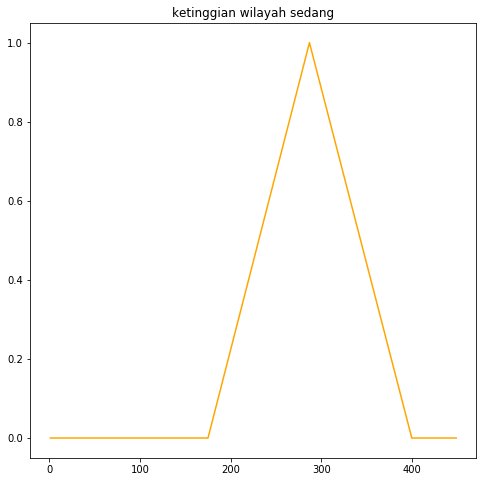

In [7]:
ketinggianwilayah_sedang = fuzz.trimf(ketinggianwilayah1,[175, 287, 400])
fig, (ax0) = plt.subplots(nrows=1,figsize=(8,8))
ax0.plot(ketinggianwilayah1, ketinggianwilayah1_sedang,'orange')
ax0.set_title('ketinggian wilayah sedang')

kurva diatas adalah kurva ketinggian wilayah sedang dengan titik awal (175), titik puncak (287), titik akhir (400)

Text(0.5,1,'ketinggian wilayah tinggi')

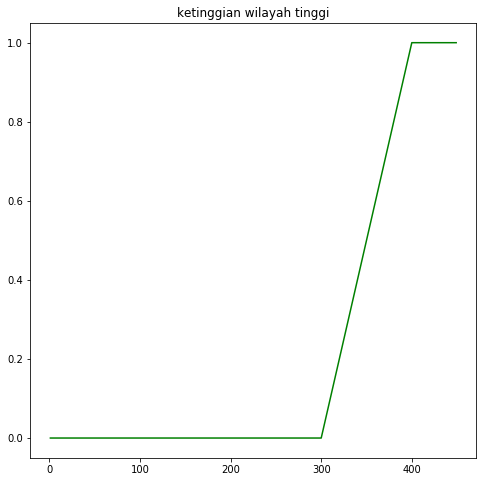

In [8]:
ketinggianwilayah_tinggi = fuzz.trapmf(ketinggianwilayah1,[300, 400, 450, 450])
fig, (ax0) = plt.subplots(nrows=1,figsize=(8,8))
ax0.plot(ketinggianwilayah1, ketinggianwilayah1_tinggi,'green')
ax0.set_title('ketinggian wilayah tinggi')

kurva diatas adalah kurva ketinggian wilayah tinggi dengan titik awal (300), titik puncak 1(400), titik pucak2 (450), titik akhir (450)

C:\Users\asus-pc\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


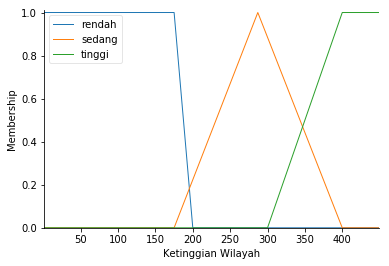

In [9]:
ketinggianwilayah.view()

kurva diatas adalah kurva ketinggian wilayah mulai dari rendah, sedang sampai tinggi

Terdapat 3 fungsi keanggotaan dari setiap fuzzifikasi input curah hujan, yaitu
1. curah hujan **rendah** = 1-20 mm/hari
2. curah hujan **sedang** = 15-20 mm/hari
3. curah hujan **tinggi** = 40-100 mm/hari
4. curah hujan **sangat tinggi** = 90 mm/hari

Dengan fungsi keanggotaan curah hujan

\begin{equation}
  curah hujan['rendah'] = \mu CurahHujanRendah(x)=\begin{cases}
    1, & \text{$1\leq x\leq15$}.\\
    (20 - x)/(20 - 15) , & \text{$15 \leq x \leq 20$}.\\
    0, & \text{$x\geq 20$}.
  \end{cases}
  \\
  curah hujan['sedang'] = \mu CurahHujanSedang(x)=\begin{cases}
    0, & \text{$x\leq 15$ atau $x\geq50$}.\\
    (x - 15)/(32 - 15) , & \text{$15 \leq x \leq 32$}.\\
    (50 - x)/(50 - 32) , & \text{$32 \leq x \leq 50$}.\\
  \end{cases}
  \\
   curah hujan ['tinggi'] = \mu CurahHujanTinggi(x)=\begin{cases}
    0, & \text{$x\leq 40$ atau $x\geq100$}.\\
    (x - 40)/(70 - 40) , & \text{$40 \leq x \leq 70$}.\\
    (100 - x)/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
  \end{cases}
  \\
    curah hujan['sangattinggi'] = \mu CurahHujanSangatTinggi(x)=\begin{cases}
    0, & \text{$x\leq 90$}.\\
    (x - 90)/(95 - 90) , & \text{$90 \leq x \leq 95$}.\\
    1, & \text{$x\geq 95$}.
  \end{cases}
\end{equation}

In [10]:
curahhujan['rendah']=fuzz.trapmf(curahhujan.universe, [1, 1, 15, 20])
curahhujan['sedang']=fuzz.trimf(curahhujan.universe, [15, 32, 50])
curahhujan['tinggi']=fuzz.trimf(curahhujan.universe, [40, 70, 100])
curahhujan['sangat tinggi']=fuzz.trapmf(curahhujan.universe, [90, 95, 120, 120])

#untuk plot terpisah
curahhujan1_rendah = fuzz.trapmf(curahhujan1, [1, 1, 15, 20])
curahhujan1_sedang = fuzz.trimf(curahhujan1, [15, 32, 50])
curahhujan1_tinggi = fuzz.trimf(curahhujan1, [40, 70, 100])
curahhujan1_stinggi = fuzz.trapmf(curahhujan1, [90, 95, 120, 120])

Karena kita akan menggunakan kurva trapesium, maka fungsi yang akan digunakan adalah fuzz.trapmf lalu untuk mendefinisikan domainnya, digunakan variabel.universe. domain (batas-batas) pada kurva trapesium ini adalah [batas awal, titik puncak1, titik puncak2, batas akhir] dan kurva segitiga, maka fungsi yang akan digunakan adalah fuzz.trimf domainnya adalah [batas awal, titik puncak, batas akhir] .

Text(0.5,1,'curah hujan rendah')

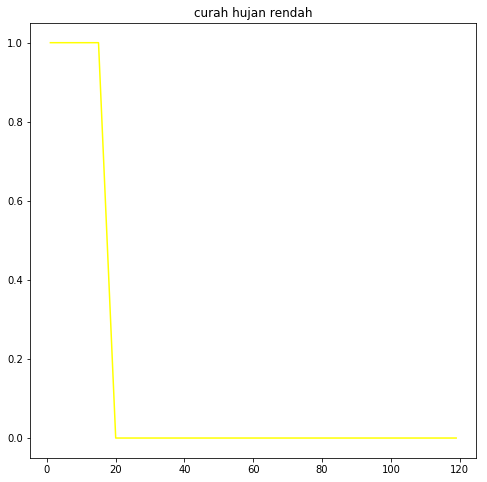

In [11]:
curahhujan_rendah = fuzz.trapmf(curahhujan1,[1, 1, 15, 20])
fig, (ax0) = plt.subplots(nrows=1,figsize=(8,8))
ax0.plot(curahhujan1, curahhujan1_rendah,'yellow')
ax0.set_title('curah hujan rendah')

kurva diatas adalah kurva curah hujan rendah dengan titik awal (1), titik puncak1 (1), titik puncak2 (15), titik akhir (20)

Text(0.5,1,'curah hujan sedang')

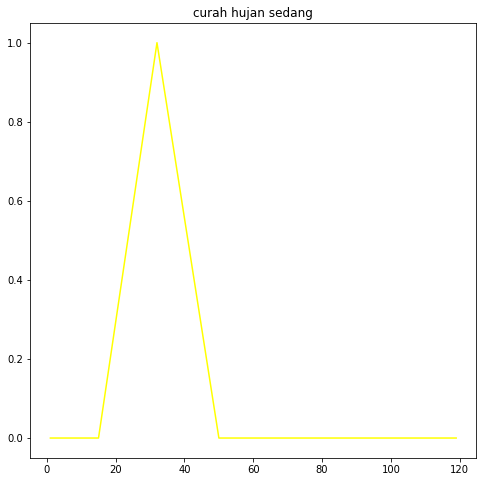

In [12]:
curahhujan_sedang = fuzz.trimf(curahhujan1,[15, 32, 50])
fig, (ax0) = plt.subplots(nrows=1,figsize=(8,8))
ax0.plot(curahhujan1, curahhujan1_sedang,'yellow')
ax0.set_title('curah hujan sedang')

kurva diatas adalah kurva curah hujan sedang dengan titik awal (15), titik puncak (32), titik akhir (50)

Text(0.5,1,'curah hujan tinggi')

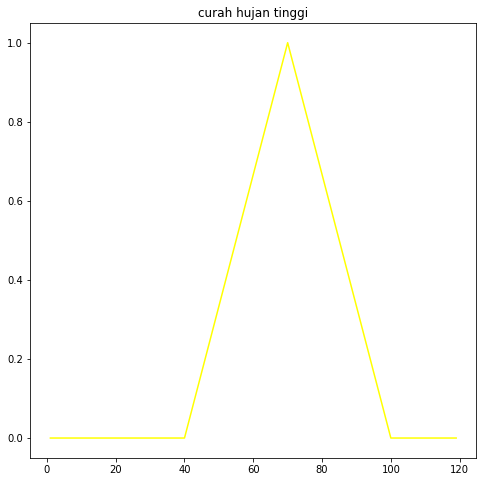

In [13]:
curahhujan_tinggi = fuzz.trimf(curahhujan1,[40, 70, 100])
fig, (ax0) = plt.subplots(nrows=1,figsize=(8,8))
ax0.plot(curahhujan1, curahhujan1_tinggi,'yellow')
ax0.set_title('curah hujan tinggi')

kurva diatas adalah kurva curah hujan tinggi dengan titik awal (40), titik puncak (70), titik akhir (100)

Text(0.5,1,'curah hujan sangat tinggi')

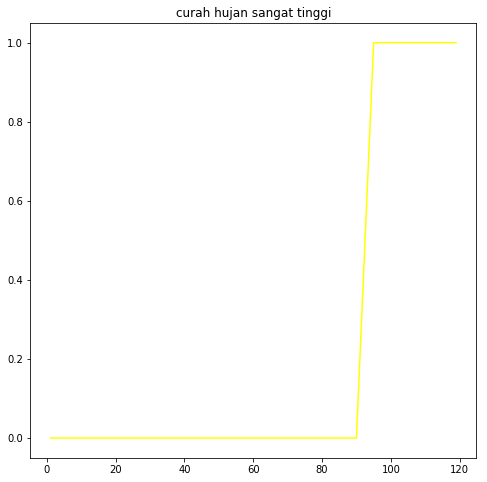

In [14]:
curahhujan_stinggi = fuzz.trapmf(curahhujan1,[90, 95, 120, 120])
fig, (ax0) = plt.subplots(nrows=1,figsize=(8,8))
ax0.plot(curahhujan1, curahhujan1_stinggi,'yellow')
ax0.set_title('curah hujan sangat tinggi')

kurva diatas adalah kurva curah sangat tinggi dengan titik awal (90), titik puncak1 (95), titik pucak2 (120) titik akhir (120)

C:\Users\asus-pc\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


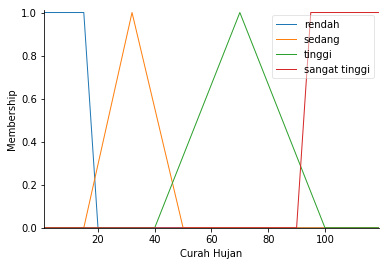

In [15]:
curahhujan.view()

kurva diatas adalah kurva curah hujan mulai dari rendah, sedang, tinggi sampai sangat tinggi

Terdapat 3 fungsi keanggotaan dari setiap fuzzifikasi kerentanan banjir, yaitu
1. kerentanan banjir **aman** :123-248
2. kerentanan banjir **rawan** :220-402
3. terjadinya **banjir** :374-42

Dengan fungsi keanggotaan kerentanan banjir

\begin{equation}
  kerentanan banjir['aman'] = \mu KerentananBanjirAman(x)=\begin{cases}
    1, & \text{$123\leq x\leq220$}.\\
    (248 - x)/(248 - 220) , & \text{$220 \leq x \leq 248$}.\\
    0, & \text{$x\geq 248$}.
  \end{cases}
  \\
  kerentanan banjir['rawan'] = \mu KerentananBanjirRawan(x)=\begin{cases}
    0, & \text{$x\leq 220$ atau $x\geq402$}.\\
    (x - 220)/(311 - 220) , & \text{$220 \leq x \leq 331$}.\\
    (402 - x)/(402 - 311) , & \text{$311 \leq x \leq 402$}.\\
  \end{cases}
  \\
   kerentanan banjir['banjir'] = \mu TerjadinyaBanjir(x)=\begin{cases}
    0, & \text{$x\leq 374$}.\\
    (x - 374)/(402 - 374) , & \text{$374 \leq x \leq 402$}.\\
    1, & \text{$x\geq 402$}.
  \end{cases}
\end{equation}

In [16]:
kerentananbanjir['aman']=fuzz.trapmf(kerentananbanjir.universe, [123, 123, 220, 248])
kerentananbanjir['rawan']=fuzz.trimf(kerentananbanjir.universe, [220, 311, 402])
kerentananbanjir['banjir']=fuzz.trapmf(kerentananbanjir.universe, [374, 402, 450, 450])

#untuk plot terpisahk
kerentananbanjir1_aman = fuzz.trapmf(kerentananbanjir1, [123, 123, 220, 248])
kerentananbanjir1_rawan = fuzz.trimf(kerentananbanjir1, [220, 311, 402])
kerentananbanjir1_banjir = fuzz.trapmf(kerentananbanjir1, [374, 402, 450, 450])

Karena kita akan menggunakan kurva trapesium, maka fungsi yang akan digunakan adalah fuzz.trapmf lalu untuk mendefinisikan domainnya, digunakan variabel.universe. domain (batas-batas) pada kurva trapesium ini adalah [batas awal, titik puncak1, titik puncak2, batas akhir] dan kurva segitiga, maka fungsi yang akan digunakan adalah fuzz.trimf domainnya adalah [batas awal, titik puncak, batas akhir] .

Text(0.5,1,'kerentanan banjir adalah aman ')

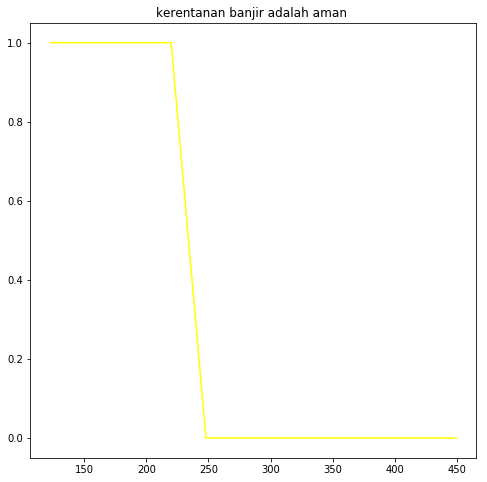

In [17]:
kerentananbanjir_aman = fuzz.trapmf(kerentananbanjir1,[123, 123, 220, 248])
fig, (ax0) = plt.subplots(nrows=1,figsize=(8,8))
ax0.plot(kerentananbanjir1, kerentananbanjir1_aman,'yellow')
ax0.set_title('kerentanan banjir adalah aman ')

kurva diatas adalah kurva kerentanan banjir aman dengan titik awal (123), titik puncak1 (123), titik pucak2 (220) titik akhir (248)

Text(0.5,1,'kerentanan banjir adalah rawan ')

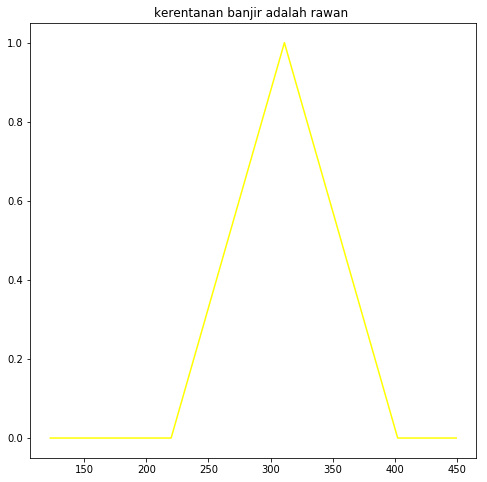

In [18]:
kerentananbanjir_rawan = fuzz.trimf(kerentananbanjir1,[220, 311, 402])
fig, (ax0) = plt.subplots(nrows=1,figsize=(8,8))
ax0.plot(kerentananbanjir1, kerentananbanjir1_rawan,'yellow')
ax0.set_title('kerentanan banjir adalah rawan ')

kurva diatas adalah kurva kerentanan banjir rentan dengan titik awal (220), titik puncak (331), titik akhir (402)

Text(0.5,1,'terjadinya banjir ')

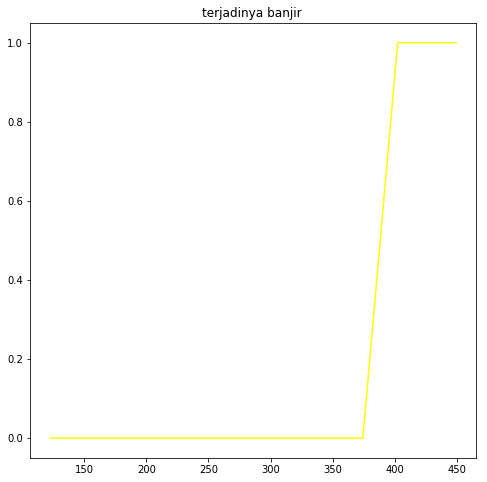

In [19]:
kerentananbanjir_banjir = fuzz.trapmf(kerentananbanjir1,[374, 402, 450, 450])
fig, (ax0) = plt.subplots(nrows=1,figsize=(8,8))
ax0.plot(kerentananbanjir1, kerentananbanjir1_banjir,'yellow')
ax0.set_title('terjadinya banjir ')

kurva diatas adalah kurva terjadinya banjir dengan titik awal (374), titik puncak1 (402), titik pucak2 (450) titik akhir (450)

C:\Users\asus-pc\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


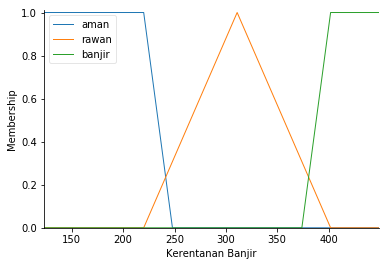

In [20]:
kerentananbanjir.view()

kurva diatas adalah kurva kerentanan banjir mulai dari aman, rawan dan banjir

# Ruled Base kerentanan banjir

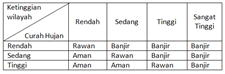

berikut ini adalah ruled base yang digunakan dalam perhitungan ini

In [21]:
rule1 = ctrl.Rule(ketinggianwilayah['rendah'] & curahhujan['rendah'], kerentananbanjir['rawan'])
rule2 = ctrl.Rule(ketinggianwilayah['sedang'] & curahhujan['rendah'], kerentananbanjir['aman'])
rule3 = ctrl.Rule(ketinggianwilayah['tinggi'] & curahhujan['rendah'], kerentananbanjir['aman'])
rule4 = ctrl.Rule(ketinggianwilayah['rendah'] & curahhujan['sedang'], kerentananbanjir['banjir'])
rule5 = ctrl.Rule(ketinggianwilayah['sedang'] & curahhujan['sedang'], kerentananbanjir['rawan'])
rule6 = ctrl.Rule(ketinggianwilayah['tinggi'] & curahhujan['sedang'], kerentananbanjir['aman'])
rule7 = ctrl.Rule(ketinggianwilayah['rendah'] & curahhujan['tinggi'], kerentananbanjir['banjir'])
rule8 = ctrl.Rule(ketinggianwilayah['sedang'] & curahhujan['tinggi'], kerentananbanjir['banjir'])
rule9 = ctrl.Rule(ketinggianwilayah['tinggi'] & curahhujan['tinggi'], kerentananbanjir['rawan'])
rule10 = ctrl.Rule(ketinggianwilayah['rendah'] & curahhujan['sangat tinggi'], kerentananbanjir['banjir'])
rule11 = ctrl.Rule(ketinggianwilayah['sedang'] & curahhujan['sangat tinggi'], kerentananbanjir['banjir'])
rule12 = ctrl.Rule(ketinggianwilayah['tinggi'] & curahhujan['sangat tinggi'], kerentananbanjir['banjir'])

In [22]:
simulasi_kerentananbanjir = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12])

diatas adalah rule evaluation pada codingan program ini

In [23]:
prediksi_kerentananbanjir = ctrl.ControlSystemSimulation(simulasi_kerentananbanjir)

In [24]:
prediksi_kerentananbanjir.input['Ketinggian Wilayah'] = 100
prediksi_kerentananbanjir.input['Curah Hujan'] = 75

In [25]:
prediksi_akhir = prediksi_kerentananbanjir.compute()
prediksi_akhir = prediksi_kerentananbanjir.output['Kerentanan Banjir']
print ("Perhitungan hasil komputasi = %.3f" % prediksi_akhir)

Perhitungan hasil komputasi = 416.975


# Perhitungan Manual

suatu wilayah mempunyai ketinggian wilayah 100 dan curah hujan 75, maka dibawah ini akan dihitung tingkat kerentanan banjir di wilayah tersebut:


\begin{equation}
    ketinggian wilayah = 100 \\
    ketinggian wilayah['rendah'] = \mu KetinggianWilayahRendah(x)=\begin{cases}
    1, & \text{$1\leq x\leq200$}.\\
    (1 - x)/(1 - 200) , & \text{$1 \leq x \leq 200$}. \checkmark \\
    0, & \text{$x\geq 200$}.
  \end{cases}
  \\
  ketinggian wilayah['sedang'] = \mu KetinggianWilayahSedang(x)=\begin{cases}
    0, & \text{$x\leq 175$ atau $x\geq400$}.\\
    (x - 175)/(287 - 175) , & \text{$175 \leq x \leq 287$}.\\
    (400 - x)/(400 - 287) , & \text{$287 \leq x \leq 400$}.\\
  \end{cases}
  \\
    ketinggian wilayah['tinggi'] = \mu KetinggianWilayahTinggi(x)=\begin{cases}
    0, & \text{$x\leq 300$}.\\
    (x - 300)/(400 - 300) , & \text{$300 \leq x \leq 400$}.\\
    1, & \text{$x\geq 400$}.
  \end{cases}
\end{equation}

Ketinggian wilayah 100 termasuk ke zona ketinggian wilayah rendah, maka perhitungannya sebagai berikut:

input = 100


\begin{equation}
  ketinggian wilayah['rendah'] = \mu KetinggianWilayahRendah(x)=\begin{cases}
    1, & \text{$1\leq x\leq200$}.\\
    (1 - x)/(1 - 200) , & \text{$1 \leq x \leq 200$}.\\
    0, & \text{$x\geq 200$}.
  \end{cases}
  \\
  \mu KetinggianWilayah(100) = (1 - 100) / (1 - 200) \\
    \mu Rendah(100) = 99/199 \\ 
    \mu Rendah(100) = 0.497 \\
   \end{equation}

\begin{equation}
    Curah Hujan = 75 \\
  curah hujan['rendah'] = \mu CurahHujanRendah(x)=\begin{cases}
    1, & \text{$1\leq x\leq15$}.\\
    (20 - x)/(20 - 15) , & \text{$15 \leq x \leq 20$}.\\
    0, & \text{$x\geq 20$}.
  \end{cases}
  \\
  curah hujan['sedang'] = \mu CurahHujanSedang(x)=\begin{cases}
    0, & \text{$x\leq 15$ atau $x\geq50$}.\\
    (x - 15)/(32 - 15) , & \text{$15 \leq x \leq 32$}.\\
    (50 - x)/(50 - 32) , & \text{$32 \leq x \leq 50$}.\\
  \end{cases}
  \\
   curah hujan ['tinggi'] = \mu CurahHujanTinggi(x)=\begin{cases}
    0, & \text{$x\leq 40$ atau $x\geq100$}.\\
    (x - 40)/(70 - 40) , & \text{$40 \leq x \leq 70$}.\\
    (100 - x)/(100 - 70) , & \text{$70 \leq x \leq 100$}.\checkmark \\
  \end{cases}
  \\
    curah hujan['sangattinggi'] = \mu CurahHujanSangatTinggi(x)=\begin{cases}
    0, & \text{$x\leq 90$}.\\
    (x - 90)/(95 - 90) , & \text{$90 \leq x \leq 95$}.\\
    1, & \text{$x\geq 95$}.
  \end{cases}
\end{equation}

Curah hujan 75 termasuk ke zona curah hujan tinggi, maka perhitungannya sebagai berikut:

input = 75

\begin{equation}
curah hujan ['tinggi'] = \mu CurahHujanTinggi(x)=\begin{cases}
    0, & \text{$x\leq 40$ atau $x\geq100$}.\\
    (x - 40)/(70 - 40) , & \text{$40 \leq x \leq 70$}.\\
    (100 - x)/(100 - 70) , & \text{$70 \leq x \leq 100$}.\\
  \end{cases}
  \\
  \mu Tinggi(75) = (100 - 75) / (100-70) \\
    \mu Tinggi(75) = 25 / 30 \\
    \mu Tinggi(75) = 0.83 \\
\end{equation}

\begin{equation}
    Ketinggian Wilayah\\
    \mu KetinggianWilayahRendah(100) = 0,497 \\
    Curah Hujan\\
    \mu CurahHujanTinggi(75) = 0,83 \\
\end{equation}

Tahap selanjutnya adalah mencari fungsi implikasi dan defuzzyfikasi. Pada metode mamdani, fungsi implikasi yang digunakan adalah MIN atau menggunakan nilai minimum dan mencari nilai Z dengan memasukan nilai perhitungan diatas (KetinggianWilayahRendah dan CurahHujanTinggi) ke masing-masing fungsi keanggotaan pada setiap rule, Lalu nilai tersebut dimasukkan ke dalam fungsi keanggotaan output sehingga diperoleh nilai Z untuk setiap rule.

berdasarkan perhitungan diatas maka cuma ada 1 rule base yang digunakan yaitu:

jika Ketinggian Wilyah **Rendah** *(0,497)* dan Curah Hujan **Tinggi** *(0,83)* maka terjadinya banjir

**Berikut ini adalah cara menghitung nilai optimal fuzzy dan defuzzyfikasi**

\begin{equation}
kerentanan banjir['banjir'] = \mu TerjadinyaBanjir(x)=\begin{cases}
    0, & \text{$x\leq 374$}.\\
    (x - 374)/(402 - 374) , & \text{$374 \leq x \leq 402$}.\\
    1, & \text{$x\geq 402$}.
  \end{cases}
  \\
  \end{equation}
\\
 $$(x-374) / (402 - 374) = 0,479 $$
 $$ x-374 = 13,916 \times 25 $$
 $$ x = 13,916 + 374 $$
 $$ x = 387,916 $$
 
$$ Z1 = 387,916 $$



Selanjutnya adalah **DEFUZZYFIKASI**, yaitu dengan rumus dan perhitungan berikut:
    
 $$Z = \frac{0.497 \times 387,916 }{0.497} $$
 $$ Z = \frac{192,79}{0,497} $$
 $$ Z = 387,916 $$

 berdasarkan perhitungan manual hasilnya adalah **387,916** ,terdapat error pada perhitunangan manual dan komputasi yaitu sebesar 7,4 %

C:\Users\asus-pc\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


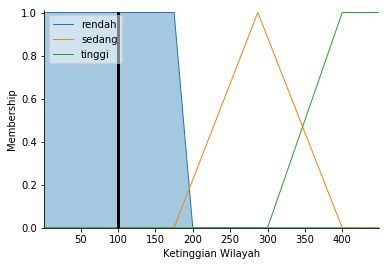

In [30]:
ketinggianwilayah.view(sim = prediksi_kerentananbanjir)

berdasarkan gambar diatas dapat dilihat bahwa nilai 100 mdpl terdapat pada ketinggian wilayah rendah

C:\Users\asus-pc\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


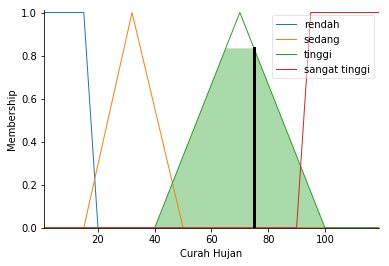

In [31]:
curahhujan.view(sim = prediksi_kerentananbanjir)

berdasarakan gambar diatas dapat dilihat bahwa nilai 75 mm/hari pada curah hujan tinggi

C:\Users\asus-pc\Anaconda3\lib\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


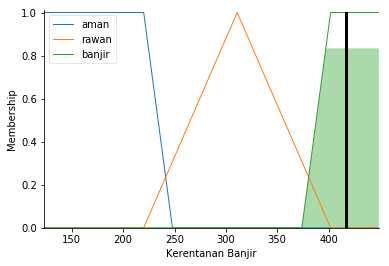

In [32]:
kerentananbanjir.view(sim = prediksi_kerentananbanjir)

berdasarkan gambar diatas dapat dilihat bahwa nilai 416.975 pada zona banjir

berdasarkan percobaan diatas dapat disimpulkan bahkan ketika ada suatu wilayah dengan ketinggian 100 mdpl dan curah hujan 75 mm/hari maka daerah tersebut akan terjadi banjir